In [1]:
import pandas as pd

In [60]:
df = pd.read_csv('cricket.csv', encoding = 'latin1' )

In [61]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [62]:
# Convert span into number of years of experience
# Split the column into start and end and store it in corresponding new columns
df[['strt','end']] = df['Span'].str.split("-", expand = True)

In [63]:
df[['strt','end']] = df[['strt','end']].astype(int)

In [64]:
df['Exp'] = df['end'] - df['strt']
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,strt,end,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17


In [65]:
df = df.drop(['strt','end','Span'],axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [66]:
# Extrct only digits from the HS column values
df['HS'] = df['HS'].str.extract('(\d+)').astype(int)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

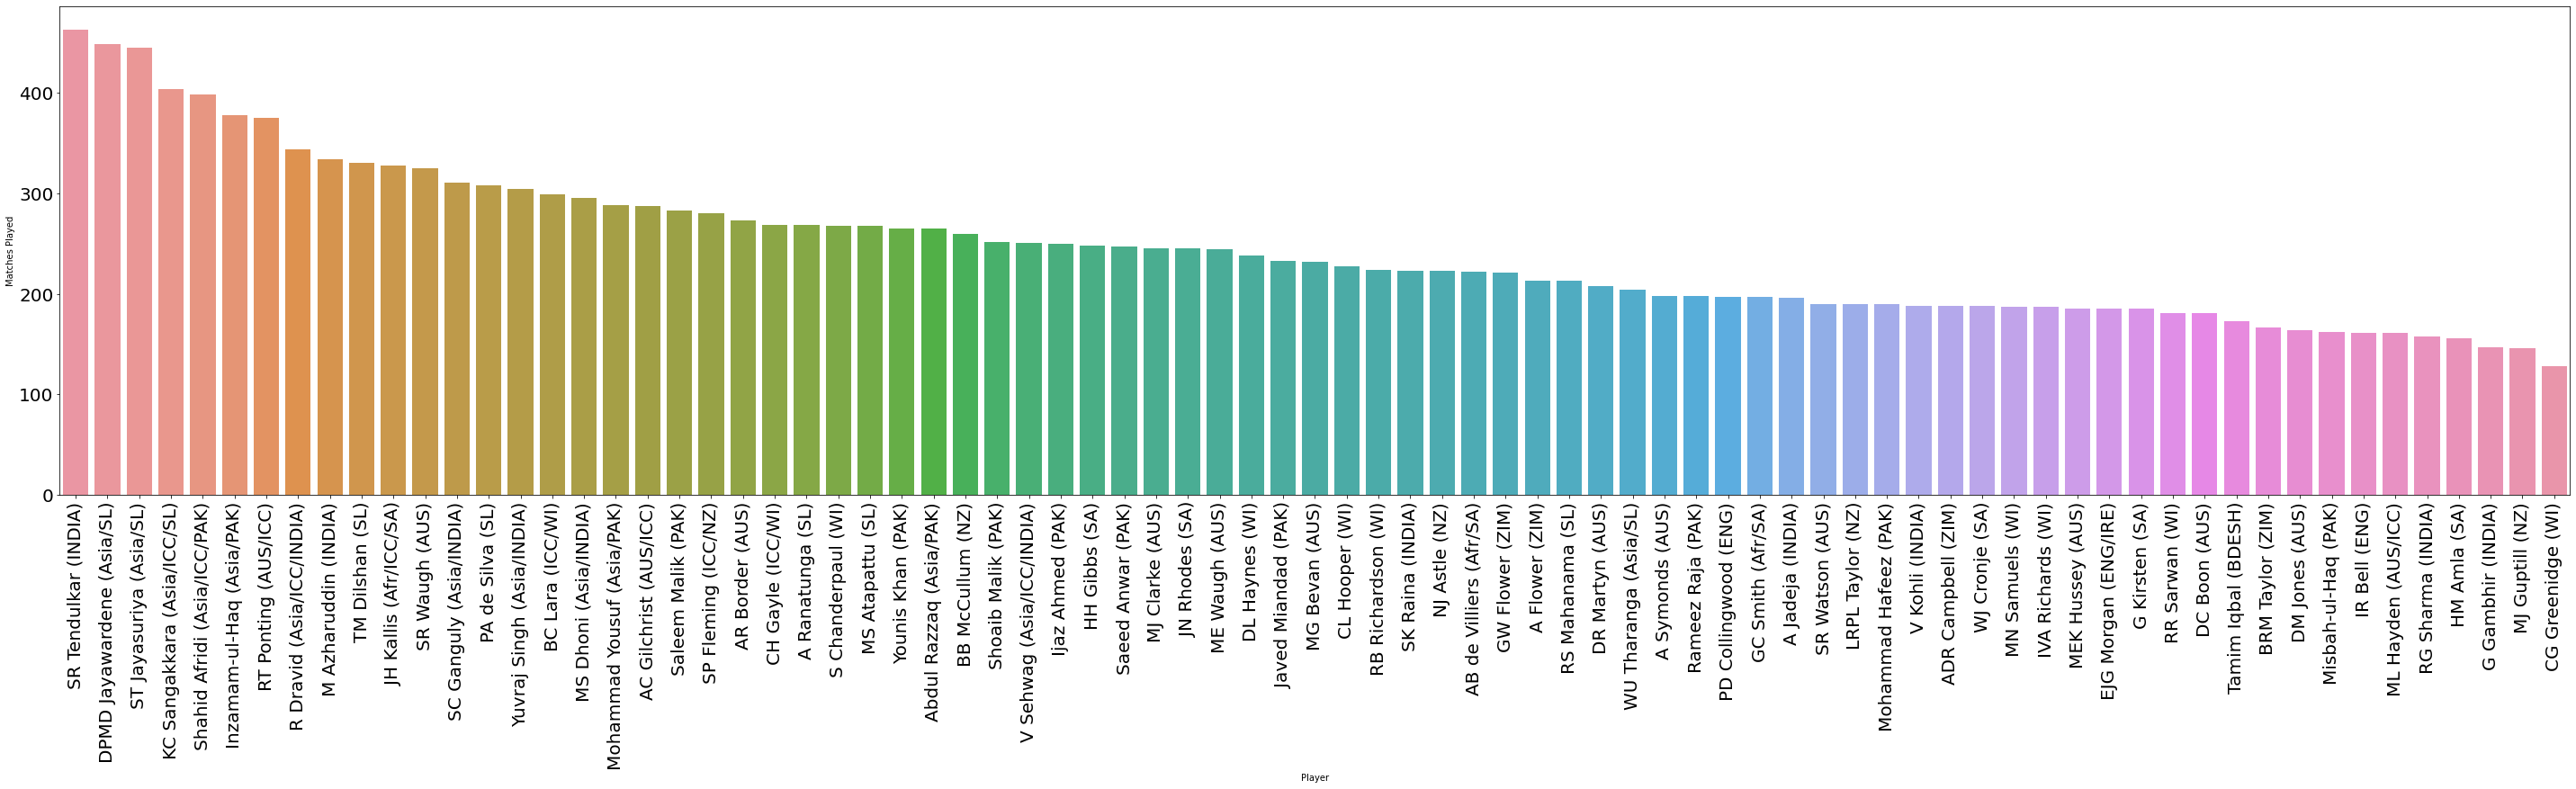

In [40]:
plt.figure(figsize = (50,10))
mat = df[['Player','Mat']].sort_values('Mat',ascending = False)
ax = sns.barplot(x = 'Player', y = 'Mat', data = mat)
plt.xticks(rotation = 90,fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Matches Played")
plt.show()

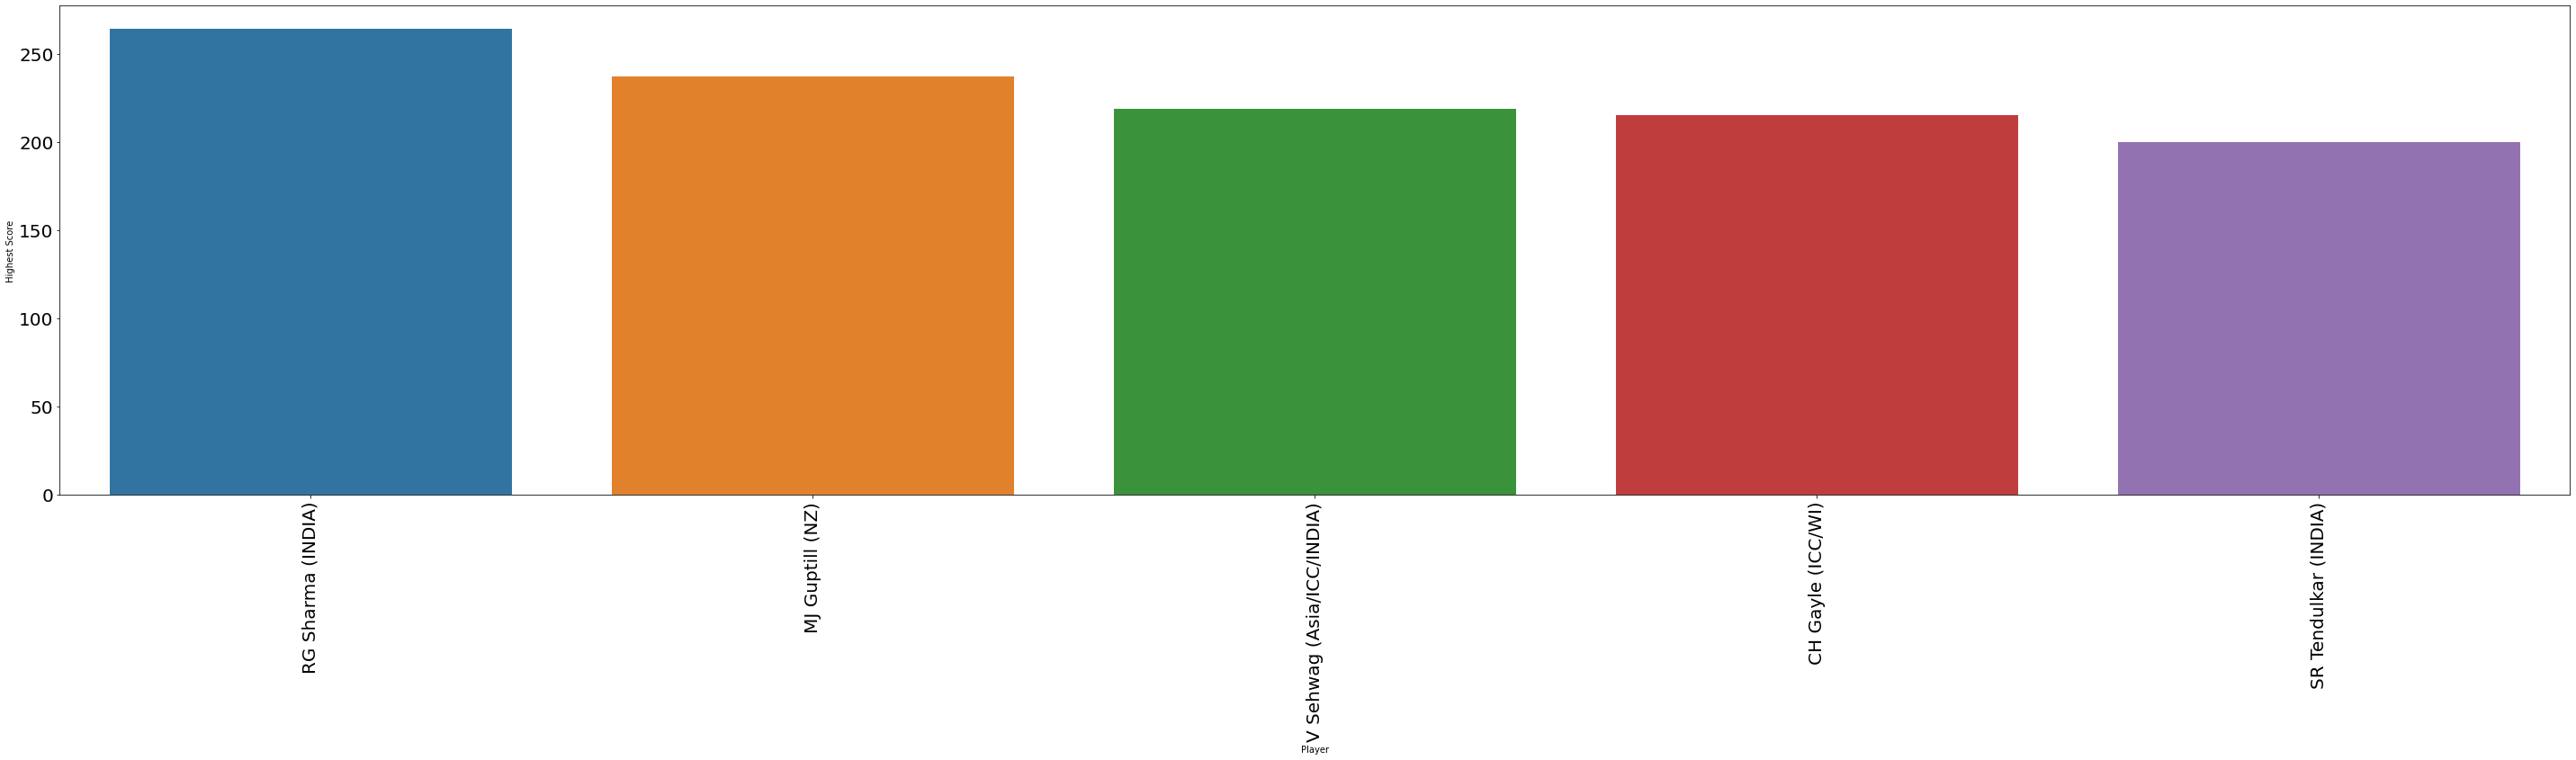

In [45]:
plt.figure(figsize = (50,10))
hs = df[['Player','HS']].sort_values('HS',ascending = False).head()
ax = sns.barplot(x = 'Player', y = 'HS', data = hs)
plt.xticks(rotation = 90,fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Highest Score")
plt.show()

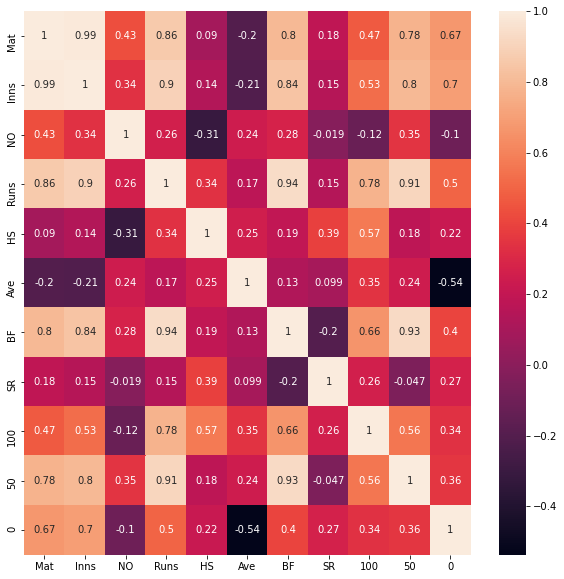

In [53]:
plt.figure(figsize = (10,10))
sns.heatmap(df[df.columns[1:]].corr(),annot = True)
plt.show()

In [70]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [55]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

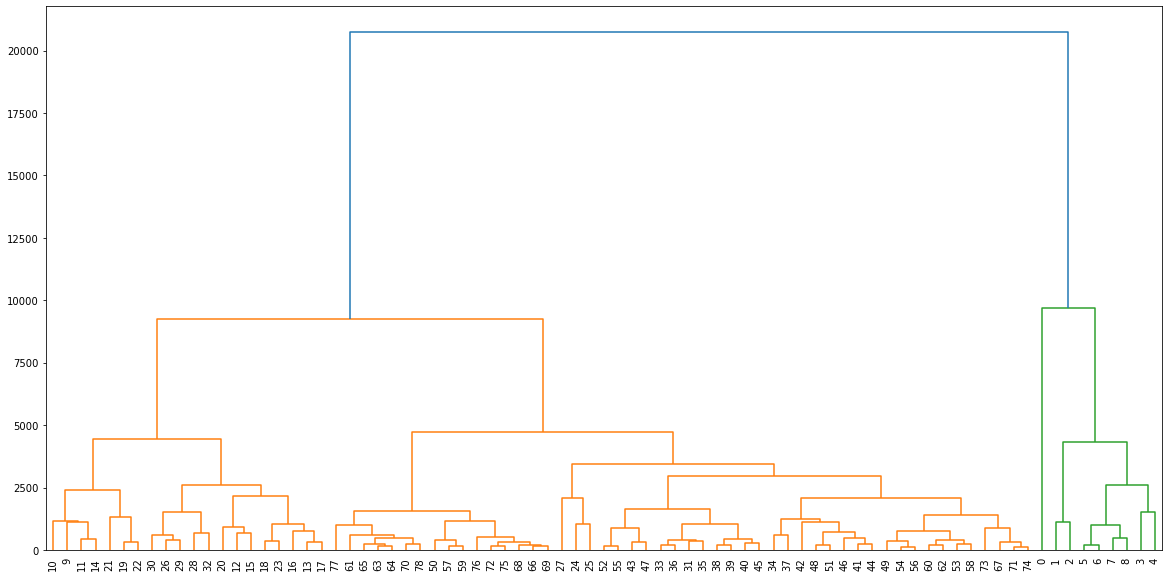

In [78]:
plt.figure(figsize=(20,10))
mergings = linkage(df[df.columns[1:]],method='complete',metric='euclidean')
dendrogram(mergings)
plt.xticks(fontsize = 10)
plt.show()

In [73]:
len(mergings)

78

In [111]:
# Mergings has the thwo cclsuters, their distance and the number of data points in the cluster
mergings

array([[7.10000000e+01, 7.40000000e+01, 1.23489710e+02, 2.00000000e+00],
       [5.40000000e+01, 5.60000000e+01, 1.38196748e+02, 2.00000000e+00],
       [5.20000000e+01, 5.50000000e+01, 1.44051431e+02, 2.00000000e+00],
       [6.30000000e+01, 6.40000000e+01, 1.52183598e+02, 2.00000000e+00],
       [5.70000000e+01, 5.90000000e+01, 1.60995616e+02, 2.00000000e+00],
       [6.60000000e+01, 6.90000000e+01, 1.63919305e+02, 2.00000000e+00],
       [7.20000000e+01, 7.50000000e+01, 1.71400146e+02, 2.00000000e+00],
       [5.00000000e+00, 6.00000000e+00, 1.86615241e+02, 2.00000000e+00],
       [6.00000000e+01, 6.20000000e+01, 1.94148225e+02, 2.00000000e+00],
       [3.80000000e+01, 3.90000000e+01, 1.94257590e+02, 2.00000000e+00],
       [4.80000000e+01, 5.10000000e+01, 2.02981273e+02, 2.00000000e+00],
       [6.80000000e+01, 8.40000000e+01, 2.11105159e+02, 3.00000000e+00],
       [3.30000000e+01, 3.60000000e+01, 2.14857080e+02, 2.00000000e+00],
       [4.10000000e+01, 4.40000000e+01, 2.26571018e

In [79]:
from sklearn.cluster import AgglomerativeClustering

In [83]:
# Perform Agglomertaive clustering
cluster  = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

In [86]:
# Get Cluster numbers for all data points
cluster_label = cluster.fit_predict(df[df.columns[1:]])
cluster_label

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
# Assign the cluster number to a new column in dataframe (original data)
df['cluster_label'] = cluster_label

In [88]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster_label
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,3
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,3
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,3
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,3


In [ ]:
# Check characteristics of the clusters created

In [91]:
data = df.groupby('cluster_label')['Mat'].mean().reset_index()
data

,cluster_label,Mat
0,0,206.660
1,1,276.600
2,2,463.000
3,3,379.125


In [92]:
data = df.groupby('cluster_label')['Runs'].mean().reset_index()
data

,cluster_label,Runs
0,0,6120.9
1,1,8888.7
2,2,18426.0
3,3,12448.5


In [94]:
data = df.groupby('cluster_label')['100'].mean().reset_index()
data

,cluster_label,100
0,0,8.320
1,1,14.250
2,2,49.000
3,3,20.375


In [97]:
df['cluster_label'].value_counts()

0    50
1    20
3     8
2     1
Name: cluster_label, dtype: int64

In [108]:
data = df.groupby('cluster_label')[['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Exp',]].mean().reset_index()
data

,cluster_label,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,0,206.660,193.20,26.66,6120.9,143.66,37.7996,7799.26,79.324,8.320,37.1,11.720,12.480
1,1,276.600,261.15,34.65,8888.7,156.50,39.7365,11275.30,79.521,14.250,53.7,13.900,15.200
2,2,463.000,452.00,41.00,18426.0,200.00,44.8300,21367.00,86.230,49.000,96.0,20.000,23.000
3,3,379.125,359.75,38.25,12448.5,159.75,39.2250,16029.50,77.685,20.375,80.5,20.375,16.875


In [106]:
df[df['cluster_label'] == 1]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster_label
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,1
10,TM Dilshan (SL),330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,1
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,1
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,1
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,1
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,1
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,1
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,1
17,CH Gayle (ICC/WI),269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,1
18,Saeed Anwar (PAK),247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,1


In [105]:
df[df['cluster_label'] == 0]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,cluster_label
24,V Sehwag (Asia/ICC/INDIA),251,245,9,8273,219,35.05,7929,104.33,15,38,14,14,0
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,0
27,Shahid Afridi (Asia/ICC/PAK),398,369,27,8064,124,23.57,6892,117.00,6,39,30,19,0
31,A Ranatunga (SL),269,255,47,7456,131,35.84,9571,77.90,4,49,18,17,0
33,Younis Khan (PAK),265,255,23,7249,144,31.24,9628,75.29,7,48,22,15,0
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,0
35,Saleem Malik (PAK),283,256,38,7170,102,32.88,9383,76.41,5,47,19,17,0
36,NJ Astle (NZ),223,217,14,7090,145,34.92,9760,72.64,16,41,19,12,0
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,0
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,0


In [112]:
# Perform standardization and redo the entire clsutering exercise

In [109]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[df.columns[1:]])
df_scaled

array([[ 2.95528204,  3.1693334 ,  0.76496275, ...,  1.14583653,
         2.81278702,  1.51462029],
       [ 2.15517925,  2.13891509,  0.76496275, ...,  0.29667062,
         0.38093832,  2.58296853],
       [ 1.76190839,  1.92424461,  0.6253968 , ...,  1.14583653,
         0.9889005 ,  2.58296853],
       ...,
       [-0.65196103, -0.70904664,  0.48583085, ..., -1.06199484,
        -1.13896711, -0.62207619],
       [-0.63839997, -0.99527395,  0.20669894, ...,  0.29667062,
        -0.83498602, -0.62207619],
       [ 0.27019133, -0.03641246,  1.88149036, ...,  0.12683744,
         0.38093832, -0.62207619]])